# Mushroom species detection

# Data Description

In this project, we will examine the data and build different machine learning models that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.

# Importing required Libaries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [75]:
data=pd.read_csv('mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).
With 8124 rows and 23 columns having different attributes

# Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# EDA of Dataset

In [76]:
df1=pd.DataFrame(data=data)
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Shape of Dataset

In [77]:
df1.shape

(8124, 23)

Having dimensions of 8124 rows and 23 columns

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

from info we can see that 8124 rows are having not null values with 22 data object and consumes the memory more than 1.4MB. while stalk root is having 2480 missing values

In [79]:
df1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Through descriptive statistics count shows the no.of responses with uniquness in each of species pretaining to their highest occuring category along with frequency of occurence.

In [80]:
df1.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

<AxesSubplot:>

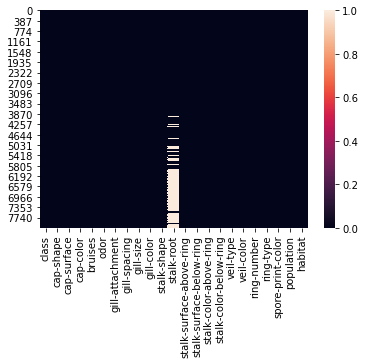

In [81]:
sns.heatmap(df1.isnull())

Through data visulisation we can interpet that there are missing values in stalk-root columns around in 2400+ rows

# Visualizing the count of edible and poisonous Mushrooms

In [82]:
df1['class'].unique()
df1['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In class we have 2 unique values that is e-edible mushrooms and p-poisonous mushrooms whose occurence is 4208 and 3916 times respectively.

Class categories are not so much imbalance. Lets check the same in visulation of plot below

# Univariate Analysis

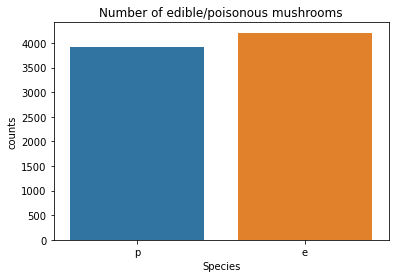

In [83]:
sns.countplot(x='class',data=df1)
plt.xlabel('Species')
plt.ylabel('counts')
plt.title('Number of edible/poisonous mushrooms')
plt.show()

# Bivariate Analysis

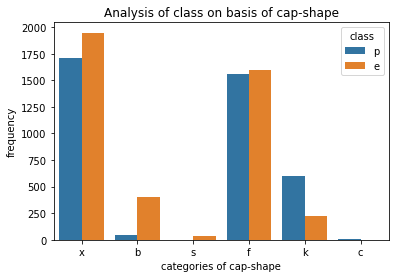

In [84]:
sns.countplot(x='cap-shape',data=df1,hue='class')
plt.xlabel('categories of cap-shape')
plt.ylabel('frequency')
plt.title('Analysis of class on basis of cap-shape')
plt.show()

we can easily notice, the mushrooms with a cap-shape flat cap-shape are mostly edible (n=1596) and an equally similar number are poisonous (n=1556). A majority of bellshaped mushrooms(0) (n=404) are edible. All conical cap-shaped(1) mushrooms are poisonous (n=4). And, all sunken cap-shaped(4) mushrooms are edible (n=32).While mushrooms with cap-shaped convex having majority of edible(n=1950) and similar no. are poisonous(n=1735)

# Will check how gill -color and class is related

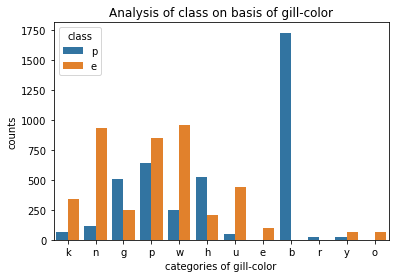

In [85]:
sns.countplot(x='gill-color',data=df1,hue='class')
plt.xlabel('categories of gill-color')
plt.ylabel('counts')
plt.title('Analysis of class on basis of gill-color')
plt.show()

From above visulation it can be noticed that mushrooms with gill-color buff & green are totally poisonous with value of (n=1728,24)respectively
Mushrooms with gill-color brown,white,purple,yellow,orange & red mostly are edible mushrooms with n=(936,956,444,64,64,96) respectively.

# Will check relation between habitat & class

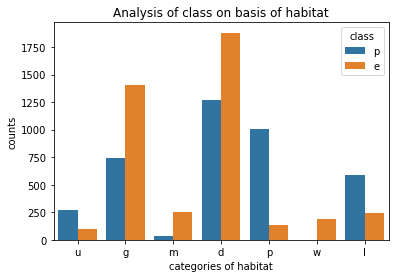

In [86]:
sns.countplot(x='habitat',data=df1,hue='class')
plt.xlabel('categories of habitat')
plt.ylabel('counts')
plt.title('Analysis of class on basis of habitat')
plt.show()

we see a most  of mushrooms that live in woods, grasses, leaves, meadows and paths are edible. Surprisingly, the one’s living in waste areas are entirely edible.

# Will analysis the population and class relation

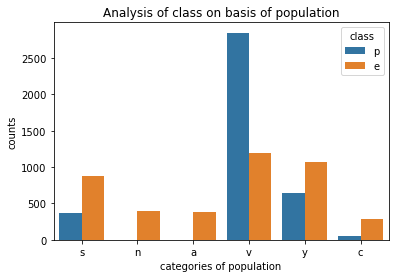

In [87]:
sns.countplot(x='population',data=df1,hue='class')
plt.xlabel('categories of population')
plt.ylabel('counts')
plt.title('Analysis of class on basis of population')
plt.show()

We can see majority of population in several is most of poisonus mushrooms,while abudant and numerous are totally edible .

population of clustered,scattered and solitary are most of edible mushrooms

# Data Manipulation

The data is categorical so we will use LabelEncoder converts each value in a column to a number.

In [88]:
le=LabelEncoder()
list1=df1.columns
for val in list1:
    df1[val]=le.fit_transform(df1[val].astype(str))

In [89]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


As after label encoding we can see all values has been changed to numerical and there are no categorial values has been left.
Column veil-type is 0 and not contributing any significance to data so same will be removed

In [90]:
df=df1.drop(['veil-type'],axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


So after removing the veil column new data set will be having 8124 rows & 22 columns.

<AxesSubplot:>

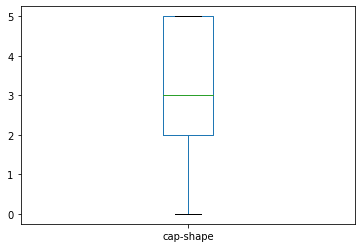

In [91]:
df['cap-shape'].plot.box()

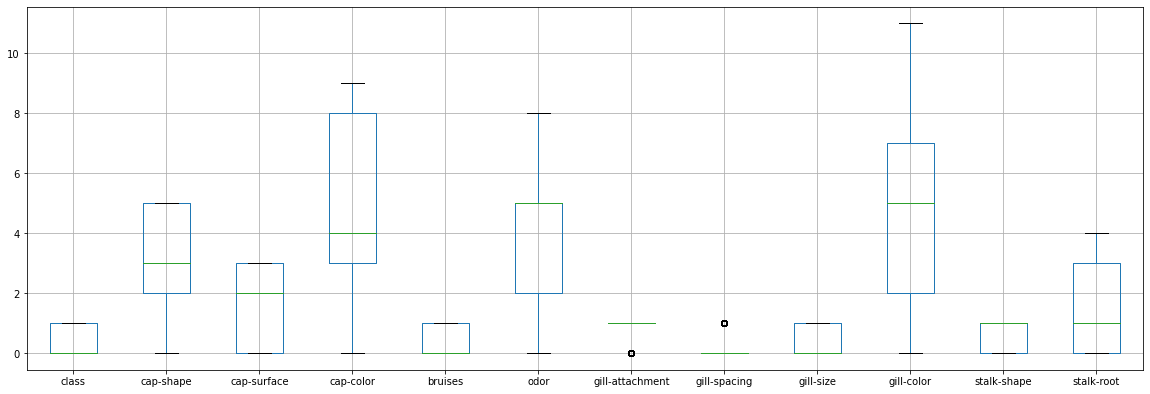

In [92]:
df.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

From columns class to stalk root in box plot we can see that there are no outliers as above is categorial dataset.

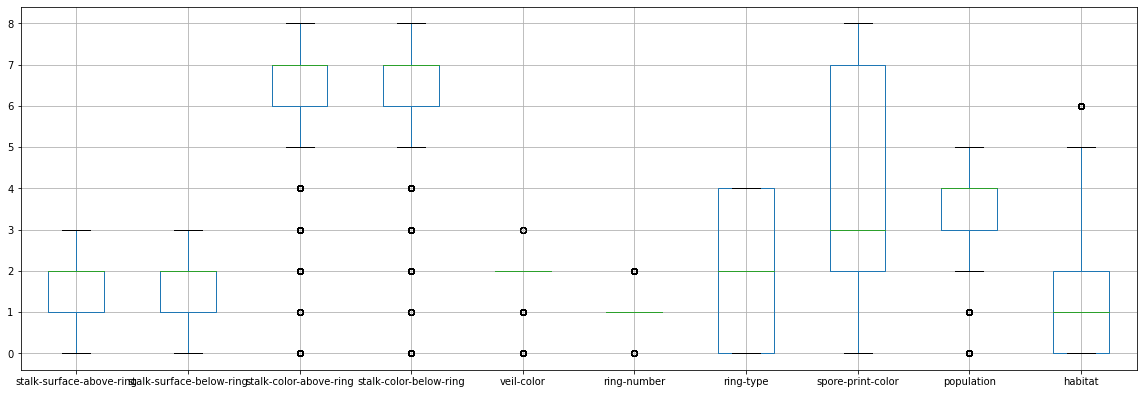

In [93]:
df.iloc[:,12:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

from columns stalk-surface to habitat we can see there are categorial outliers in stalk-colour above rings,stalk- color below ring & in populationa and habitat.

# Multi-Variate Analysis

<AxesSubplot:>

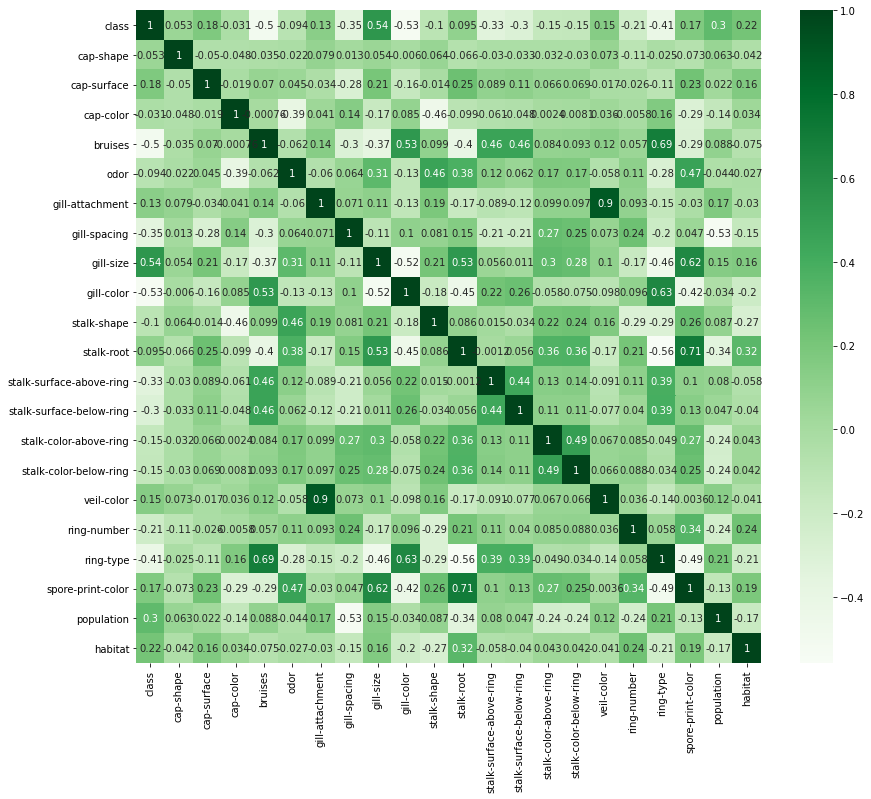

In [94]:
fig=plt.figure(figsize=(14,12))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Greens')

Through above correlation visulation we can notice that brusies & ring type have are postively related,then gill-attachment with veil-color .
cap-shape,surface,gill-attachment,stalk-root ,population & habitat are positively co-related.
while gill-color is least co-related with value of -0.53 which is most important in classification as its change in values will not effect highly to class value.

<AxesSubplot:xlabel='population', ylabel='class'>

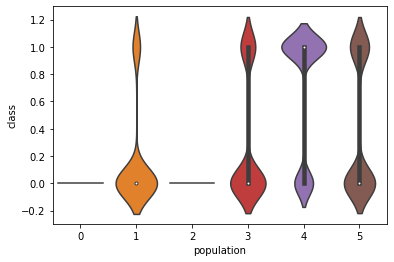

In [95]:
sns.violinplot(x='population',data=df,y='class')

From above violin plot it can be notice that most of cateorgies in population are edible except category 4.

<AxesSubplot:xlabel='gill-color', ylabel='class'>

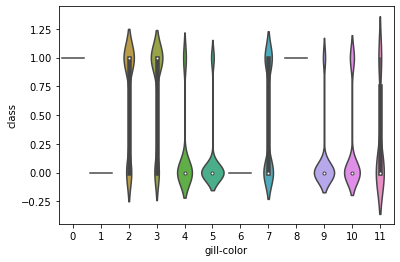

In [96]:
sns.violinplot(x='gill-color',y='class',data=df)

Gill-color categories of 4,5,6,7,8,9,10 are mostly edible while 0,1 ,2 & 3 are poisinous ones.
values below 3 are poisnous while above are edible.

<AxesSubplot:xlabel='gill-size', ylabel='class'>

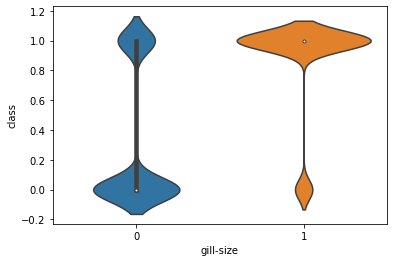

In [97]:
sns.violinplot(x='gill-size',y='class',data=df)

We can notice that there are 2 types of gill size one is 0 & 1 while 0 category are majority of edible while 1 are poisinous.

# Preparing the data 

setting the x & y axis for traning and testing respectively for the dataset

In [98]:
x=df.iloc[:,1:23]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [99]:
y=df.iloc[:,0:1]
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


Now we have set the x axis and y axis for traning and testing the model

# Training the model through train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 21)
(2438, 21)
(5686, 1)
(2438, 1)


Out of 8124 rows 5686 rows from data set will train and 2438 rows will b sent for predicting or testing the values of class

we are testing the 30% of data and training 70% of it with random state of 45th row.

# Model fitting through Classification methods

As we have binary class in target variable so Logistic regression and other classification methods will be apply for model fitting.

In [101]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9515996718621821
[[1206   49]
 [  69 1114]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1255
           1       0.96      0.94      0.95      1183

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



Test accuracy from Logistic regression is 95%  as well as f1 score is equal between both the class which shows that test & trained data is balanced 

In [102]:
dtc=DecisionTreeClassifier(max_depth=11,min_samples_leaf=5)
dtc.fit(x_train,y_train)
predd=dtc.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

1.0
[[1255    0]
 [   0 1183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



From Decision tree we are getting 100% accuracy as well as in confusion matrix 0 false negative & positive values, so through Decision tree model testing we will get the predicted results  correctly for mushrooms are edible or poisonous 

In [104]:
kernellist=['linear','rbf','poly']
for i in kernellist:
    sv=SVC(kernel=i)
    sv.fit(x_train,y_train)
    preds=sv.predict(x_test)
    print('Accuracy score of',i,'is:')
    print(accuracy_score(y_test,preds))
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))

Accuracy score of linear is:
0.9622641509433962
[[1204   51]
 [  41 1142]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1255
           1       0.96      0.97      0.96      1183

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

Accuracy score of rbf is:
0.9979491386382281
[[1255    0]
 [   5 1178]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy score of poly is:
0.9987694831829368
[[1255    0]
 [   3 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1     

output accuracy through SVC in poly kernel is best that is 99.87% as well as in confusion matrix false positive values are 0 while false negative is very less.
So in SVC -poly kernel model will give good predictions for edibel and poisonous mushrooms

# KNeighbors classifier

In [106]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predk=knn.predict(x_test)
print(accuracy_score(y_test,predk))
print(confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))

0.9987694831829368
[[1253    2]
 [   1 1182]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In KNeighbors model we are getting 99.87% accuracy score after testing the model.

# From Naive_Bayes will use GaussianNB as target value is categorial in 2 classes or binary data.

In [107]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.916735028712059
[[1154  101]
 [ 102 1081]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1255
           1       0.91      0.91      0.91      1183

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



GaussianNB model give accuray score of 92%

# Ensemble Methods

In [108]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

1.0
[[1255    0]
 [   0 1183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Random forest classifier also gives 100% accuracy score with 0 false positive and negative values.

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
grd=GradientBoostingClassifier(n_estimators=100)
grd.fit(x_train,y_train)
predgr=grd.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

1.0
[[1255    0]
 [   0 1183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Gradient boosting also gives accuracy of 100%.

Most of models is giving accuracy of more than 95%

While there are 3 models giving 100% accuracy so will check their cross validation score as well as mean accuracy.

# Cross Validation score for setting the under and over fitting

In [119]:
lgscores=cross_val_score(lg,x,y,cv=40)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.81372549 0.80392157 0.84313725 0.94117647 0.84729064 0.91625616
 0.92610837 0.9408867  0.97536946 0.98029557 0.99507389 0.99014778
 1.         0.99507389 0.98522167 0.99014778 0.98029557 0.92610837
 0.93596059 0.9408867  0.92610837 0.91625616 0.9408867  0.9408867
 1.         1.         1.         1.         1.         1.
 1.         0.99014778 0.92118227 0.8226601  0.81773399 0.96059113
 0.99014778 0.98522167 0.98522167 0.99014778]
0.9478569013812421 0.059005837169855406


After cross validating the data from 8124 rows we got mean accuracy from logistic model is 94.78%

So difference between Linear accuracy score and cross val score is .37

In [121]:
dtscores=cross_val_score(dtc,x,y,cv=40)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0 0.0


DTC scores in cross validation is also 100% so there is no difference before over and under fitting and after in DTC accuracy.

In [123]:
svscores=cross_val_score(sv,x,y,cv=40)
print(svscores)
print(svscores.mean(),svscores.std())

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99507389 1.         1.         0.99014778
 0.99014778 0.98522167 0.99507389 0.99507389 0.99507389 0.99507389
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
0.9985221674876847 0.0033410492527710636


SVscores after setting under and over fitting is 99.85% so difference between SVscore poly and sv scores in cross_val is.02

In [124]:
knscores=cross_val_score(knn,x,y,cv=40)
print(knscores)
print(knscores.mean(),knscores.std())

[0.96078431 0.99019608 0.99509804 0.99509804 0.99014778 1.
 0.99014778 1.         1.         1.         1.         1.
 1.         1.         1.         0.99507389 1.         1.
 1.         0.99507389 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
0.9977904955085481 0.006575398087603589


Cross validating the various rows for training and testing model we get the mean accuracy of 99.77% and difference between after and before is 0.1

In [125]:
gbscores=cross_val_score(gnb,x,y,cv=40)
print(gbscores)
print(gbscores.mean(),gbscores.std())

[0.8872549  0.89705882 0.82843137 0.78921569 0.68472906 0.80295567
 0.80295567 0.8817734  0.95073892 0.93596059 0.98522167 0.98522167
 0.98522167 0.97536946 0.95073892 0.97044335 0.96059113 0.85714286
 0.85221675 0.83251232 0.89162562 0.86206897 0.85221675 0.87684729
 0.95073892 0.95566502 0.95073892 0.96059113 0.97536946 0.95566502
 0.94581281 0.94581281 0.91133005 0.86206897 0.86699507 0.94581281
 0.97536946 0.97044335 0.97536946 0.98029557]
0.910664783154641 0.06828148633349493


Difference between the scores of GaussianNB before cross validitng and after is 0.61

In [126]:
rfscores=cross_val_score(rf,x,y,cv=40)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0 0.0


through Cross valditing the random forest model its providing the score of 100%

In [129]:
grdscores=cross_val_score(grd,x,y,cv=40)
print(grdscores)
print(grdscores.mean(),grdscores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0 0.0


So we can see that after cross validation mean accuracy also same 3 models providing the 100% accuracy.

We fit this type of dataset in any of 3 models -Decision Tree classifier,Random Boost and Gradient Boosting classifier.

# Will visulaze the area under precision -recall curve as well as Receiver operating characteristic (ROC)curve 

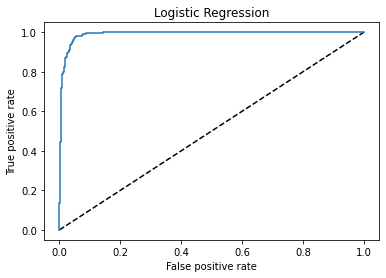

0.9513149431016424


In [130]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

We can see after probability of logistic regression on different thresholds giving the accuracy of 95%

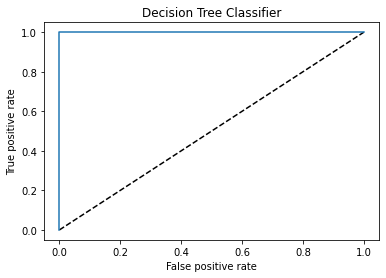

1.0


In [131]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

From above visulaziation of graph we can see the sharpness of curve is at 1 mean that accuracy is 100% for Decision tree classifier model

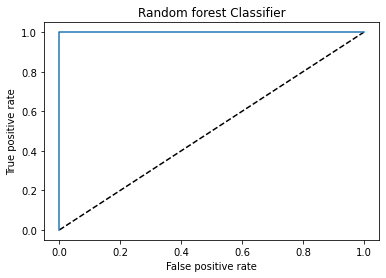

1.0


In [132]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

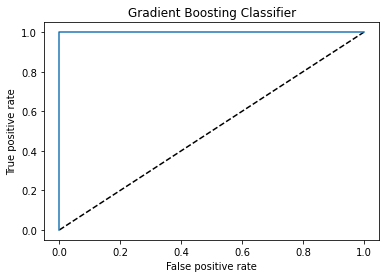

1.0


In [133]:
y_pred_prob=grd.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()
auc_score=roc_auc_score(y_test,grd.predict(x_test))
print(auc_score)

# Conculsion

From confusion matrix as well as with roc_auc curve we have saw that our data in train & test data is balanced and most of classification mehtods is fitting to dataset with accuracy of 100%

# Predictions

In [135]:
print('Predicted score:',predr)
print('Actual score:',y_test)

Predicted score: [0 0 1 ... 1 1 0]
Actual score:       class
7046      0
1967      0
4725      1
4722      1
3798      0
...     ...
2440      0
6479      1
2426      1
3211      1
5463      0

[2438 rows x 1 columns]


As we can see that the predicted and actual values are 100% match.

# Loading the model in obj file

In [136]:
joblib.dump(rf,'rf_model.obj')

['rf_model.obj']

# Re-loading the obj file

In [137]:
rffile=joblib.load('rf_model.obj')
rffile.predict(x_test)

array([0, 0, 1, ..., 1, 1, 0])

obj file is working fine and predicting the values in required manner